<a href="https://colab.research.google.com/github/mvajhi/unsupervised-learning/blob/master/HW1/ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression with K-means Clustering

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from random import sample
import scipy.misc
import matplotlib.cm as cm
from scipy import linalg
import imageio

/tmp/ipython-input-1-2042263740.py:6: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc


## 1: Implementing K-means

### 1.1: Finding closest centroids

In [2]:
datafile = '/content/data.mat' # call the MATLAB file path
mat = scipy.io.loadmat( datafile )
X = mat['X']

In [3]:
#Choose the number of centroids... K = 3
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]]) # example initial value of centroids

In [4]:
# Visualizing the data, please don't change the code below!
def plotData(myX,mycentroids,myidxs = None):
    """
    Fucntion to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """

    colors = ['b','g','gold','darkorange','salmon','olivedrab']

    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]

    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Drawing a history of centroid movement
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])

    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

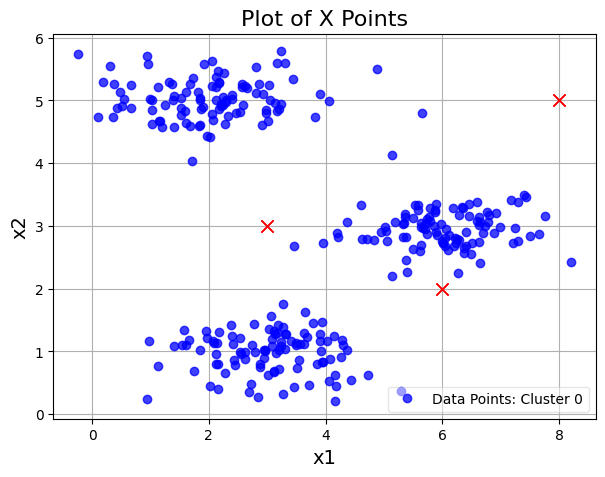

In [5]:
plotData(X,[initial_centroids])

In [6]:
def distSquared(point1, point2):
    # this function should return the squared distance between two points
    return np.linalg.norm(np.array(point1) - np.array(point2))

In [7]:
def findClosestCentroids(myX, mycentroids):
    """
    Function takes in the (m,n) X matrix
    (where m is the # of points, n is # of features per point)
    and the (K,n) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (m,1) vector of cluster indices
    per point in X (0 through K-1)
    """
    idxs = np.zeros((myX.shape[0],1))

    #Loop through each data point in X
    for x in range(idxs.shape[0]):
        # Write code here

        #Then compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in range(mycentroids.shape[0]):
            # Write code here
            dist = distSquared(myX[x], mycentroids[i])
            if dist < mindist:
                mindist = dist
                idx = i

        #With the best index found, modify the result idx vector
        # Write code here
        idxs[x] = idx

    return idxs

In [8]:
idxs = findClosestCentroids(X,initial_centroids)

#you should see the output [1 3 2] corresponding to the centroid assignments for the first 3 examples.


# print indices here (Hint: output should be [0 2 1])

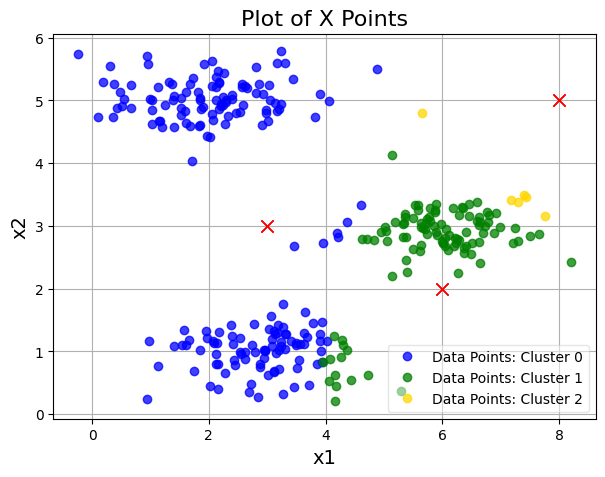

In [9]:
plotData(X,[initial_centroids],idxs)

### 1.2: Computing centroid means

In [10]:
def computeCentroids(myX, myidxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """

    # Write code here
    myidxs = myidxs.astype(int).flatten()
    clouster_count = myidxs.max() + 1
    new_centroids = np.zeros((clouster_count, myX.shape[1]))

    np.add.at(new_centroids, myidxs, myX)
    new_centroids /= np.bincount(myidxs)[:, np.newaxis]

    return new_centroids

## 2: K-means on example dataset

In [11]:
def runKMeans(myX, initial_centroids, K, n_iter):
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(myX, current_centroids)
        current_centroids = computeCentroids(myX, idxs)

    return idxs, centroid_history

In [12]:
idxs, centroid_history = runKMeans(X, initial_centroids, 3, 10)

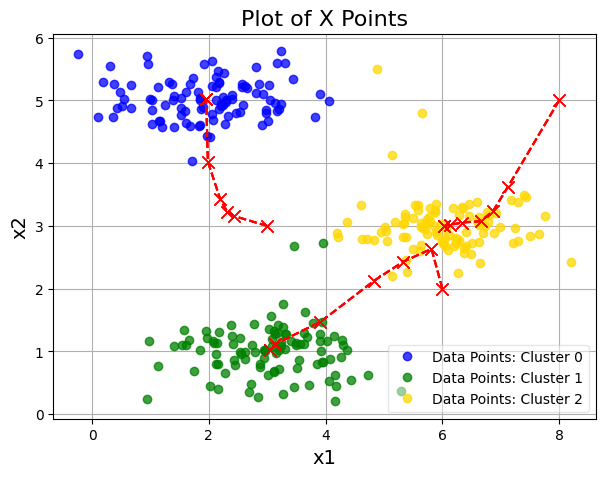

In [13]:
plotData(X,centroid_history,idxs)

## 3: Random initialization

In [14]:
def chooseKRandomCentroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])

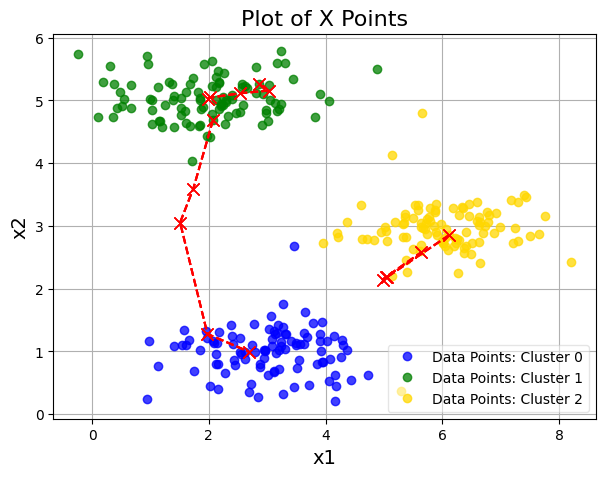

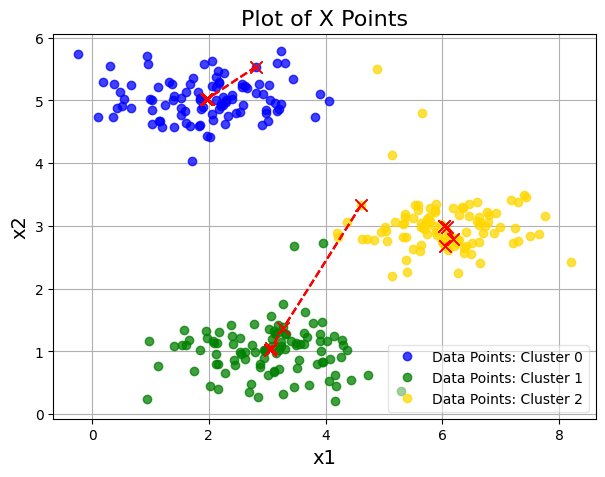

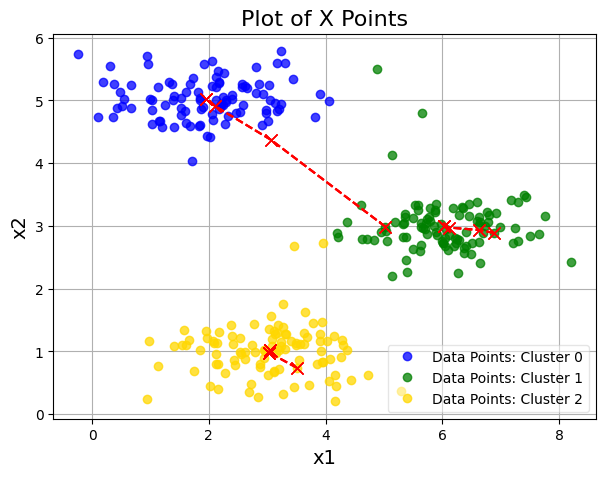

In [15]:
#Let's choose random initial centroids and see the resulting
for x in range(3):
    initial_centroids_random = chooseKRandomCentroids(X, K)
    idxs, centroid_history = runKMeans(X, initial_centroids_random, K, 5) # use functions above to complete this line of the code
    plotData(X, centroid_history,idxs)

## 4: Image compression with K-means

### 4.1: K-means on pixels

/tmp/ipython-input-16-4229489454.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  A = imageio.imread(datafile)


A shape is  (256, 256, 4)


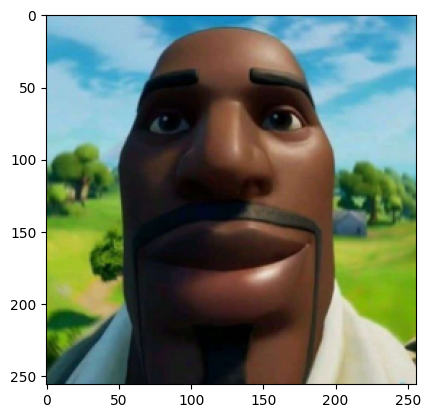

In [16]:
datafile = 'https://shapes.inc/api/public/avatar/random-iaxw'

# This creates a three-dimensional matrix A whose first two indices
# identify a pixel position and whose last index represents red, green, or blue.

A = imageio.imread(datafile)
# read the image with imageio

print("A shape is ", A.shape)
dummy = plt.imshow(A)

In [17]:
# Divide every entry in A by 255 so all values are in the range of 0 to 1
A = A / 255.
# Unroll the image to shape (16384,3) (16384 is 128*128)

A = A[:,:,:3]
shape_img = A.shape
A = A.reshape(-1,3)

# Run k-means on this data, forming 16 clusters, with random initialization
myK = 16
initial_centroids_random = chooseKRandomCentroids(A, myK)
idxs, centroid_history = runKMeans(A, initial_centroids_random, myK, 5)
# use functions above to complete this line of the code

In [18]:
# Now I have 16 centroids, each representing a color.
# Let's assign an index to each pixel in the original image dictating
# which of the 16 colors it should be
# find the closest centroid here
idxs = findClosestCentroids(A, centroid_history[-1])

In [19]:
final_centroids = centroid_history[-1]
# Now loop through the original image and form a new image
# that only has 16 colors in it
final_image = np.zeros((idxs.shape[0],3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

/tmp/ipython-input-19-3320977391.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  final_image[x] = final_centroids[int(idxs[x])]


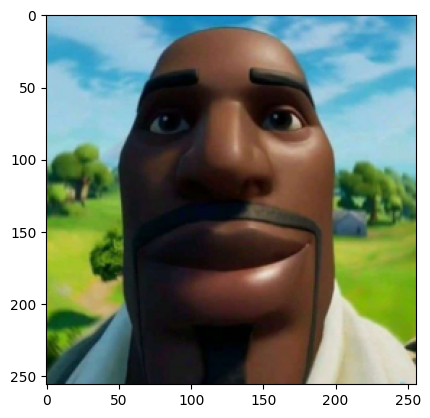

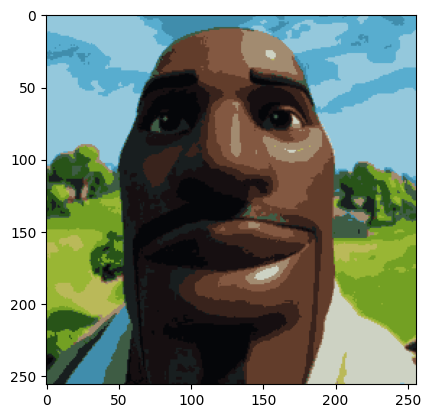

In [20]:
# Reshape the original image and the new, final image and draw them
plt.figure()
dummy = plt.imshow(A.reshape(shape_img)) # complete this line with reshaping
plt.figure()
dummy = plt.imshow(final_image.reshape(shape_img)) # complete this line with reshaping